In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\EmigrationCountries.csv') 
print(df)

                             STATISTIC Label  Year  \
0     Estimated Migration (Persons in April)  1987   
1     Estimated Migration (Persons in April)  1987   
2     Estimated Migration (Persons in April)  1987   
3     Estimated Migration (Persons in April)  1987   
4     Estimated Migration (Persons in April)  1987   
...                                      ...   ...   
2659  Estimated Migration (Persons in April)  2023   
2660  Estimated Migration (Persons in April)  2023   
2661  Estimated Migration (Persons in April)  2023   
2662  Estimated Migration (Persons in April)  2023   
2663  Estimated Migration (Persons in April)  2023   

                                                Country         Sex  \
0                                    United Kingdom (1)  Both sexes   
1                                    United Kingdom (1)  Both sexes   
2                                    United Kingdom (1)  Both sexes   
3                                    United Kingdom (1)        Male

In [3]:
year = 1988
filtered_df = df[(df['Sex'] == 'Both sexes') & (df['Year'] == year) & (df['Origin or Destination'] == 'Emigrants: All destinations')]
condition = filtered_df['Country'] == 'All countries'
filtered_df = filtered_df[~condition]
print(set(filtered_df['Country'].tolist()))

{'Other countries (23)', 'United Kingdom (1)', 'United States', 'Canada', 'EU15 to EU27 (accession countries joined post 2004)', 'EU14 excl Irl (UK & Ireland)', 'Australia'}


In [4]:
#get the eu27 values
condition = filtered_df['Country'] == "EU15 to EU27 (accession countries joined post 2004)"
eu27_row = filtered_df.loc[condition, 'VALUE']
eu27 = eu27_row.iloc[0]

#get the eu15 values and add to the eu27 values then update eu15 name
condition = filtered_df['Country'] == "EU14 excl Irl (UK & Ireland)"
eu15_row = filtered_df.loc[condition, 'VALUE']
eu15 = eu15_row.iloc[0]
filtered_df.loc[condition, 'VALUE'] = round(eu15+eu27,2)
filtered_df.loc[condition, 'Country'] = "EU"

filtered_df = filtered_df[filtered_df['Country'] != 'EU15 to EU27 (accession countries joined post 2004)']

print(filtered_df)

                            STATISTIC Label  Year               Country  \
73   Estimated Migration (Persons in April)  1988    United Kingdom (1)   
82   Estimated Migration (Persons in April)  1988         United States   
91   Estimated Migration (Persons in April)  1988                Canada   
100  Estimated Migration (Persons in April)  1988             Australia   
109  Estimated Migration (Persons in April)  1988  Other countries (23)   
127  Estimated Migration (Persons in April)  1988                    EU   

            Sex        Origin or Destination      UNIT  VALUE  
73   Both sexes  Emigrants: All destinations  Thousand   40.2  
82   Both sexes  Emigrants: All destinations  Thousand    7.9  
91   Both sexes  Emigrants: All destinations  Thousand    NaN  
100  Both sexes  Emigrants: All destinations  Thousand    NaN  
109  Both sexes  Emigrants: All destinations  Thousand   10.2  
127  Both sexes  Emigrants: All destinations  Thousand    NaN  


In [5]:
filtered_df = filtered_df.dropna(subset=['VALUE'])
print(filtered_df)

                            STATISTIC Label  Year               Country  \
73   Estimated Migration (Persons in April)  1988    United Kingdom (1)   
82   Estimated Migration (Persons in April)  1988         United States   
109  Estimated Migration (Persons in April)  1988  Other countries (23)   

            Sex        Origin or Destination      UNIT  VALUE  
73   Both sexes  Emigrants: All destinations  Thousand   40.2  
82   Both sexes  Emigrants: All destinations  Thousand    7.9  
109  Both sexes  Emigrants: All destinations  Thousand   10.2  


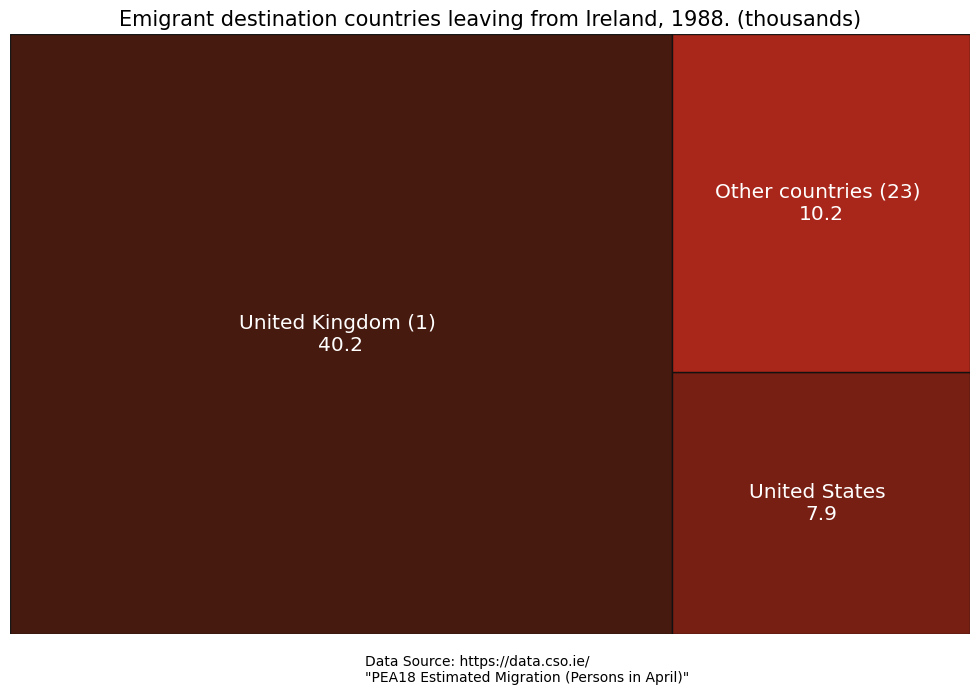

In [6]:
import squarify

fig, ax = plt.subplots(1,1,figsize=(12,8))

color_scale = ['#3d0d02','#711307', '#a51b0d', '#d42113', '#f4431f', '#f55d4b', '#fb9675', '#fca397', '#fcc5b8', '#fdded3']

labels = [f"{country+' '}\n"+f"{str(val)}" for country,val in zip(filtered_df['Country'].tolist(), filtered_df['VALUE'].tolist())] 

squarify.plot(sizes=filtered_df['VALUE'], label=labels, alpha=0.95, ec='#111111', color=color_scale, pad=0.0, text_kwargs = {'fontsize': 14.5, 'color': 'white'})
plt.axis('off')  # Remove axis
plt.title("Emigrant destination countries leaving from Ireland, "+str(year)+". (thousands)", fontsize=15)  # Add title if needed

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.text(0.37, -0.080, "Data Source: https://data.cso.ie/ \n\"PEA18 Estimated Migration (Persons in April)\"", ha='left', transform=ax.transAxes)

#plt.savefig("EmigrantCountries-"+str(year)+".png")

plt.show()

In [7]:
countries = ["United Kingdom (1)", "United States", "Australia", "EU14 excl Irl (UK & Ireland)", "Other countries (23)", "Canada"]
filtered_df = df[(df['Origin or Destination'] == 'Emigrants: All destinations') & (df['Sex'] == 'Both sexes') & (df['Country'].isin(countries))]
print(filtered_df)

                             STATISTIC Label  Year  \
1     Estimated Migration (Persons in April)  1987   
10    Estimated Migration (Persons in April)  1987   
19    Estimated Migration (Persons in April)  1987   
28    Estimated Migration (Persons in April)  1987   
37    Estimated Migration (Persons in April)  1987   
...                                      ...   ...   
2602  Estimated Migration (Persons in April)  2023   
2611  Estimated Migration (Persons in April)  2023   
2620  Estimated Migration (Persons in April)  2023   
2629  Estimated Migration (Persons in April)  2023   
2647  Estimated Migration (Persons in April)  2023   

                           Country         Sex        Origin or Destination  \
1               United Kingdom (1)  Both sexes  Emigrants: All destinations   
10                   United States  Both sexes  Emigrants: All destinations   
19                          Canada  Both sexes  Emigrants: All destinations   
28                       Australia 

In [8]:
grouped = filtered_df.groupby('Country')
print(grouped)

In [9]:
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\EmigrationCountries.csv') 

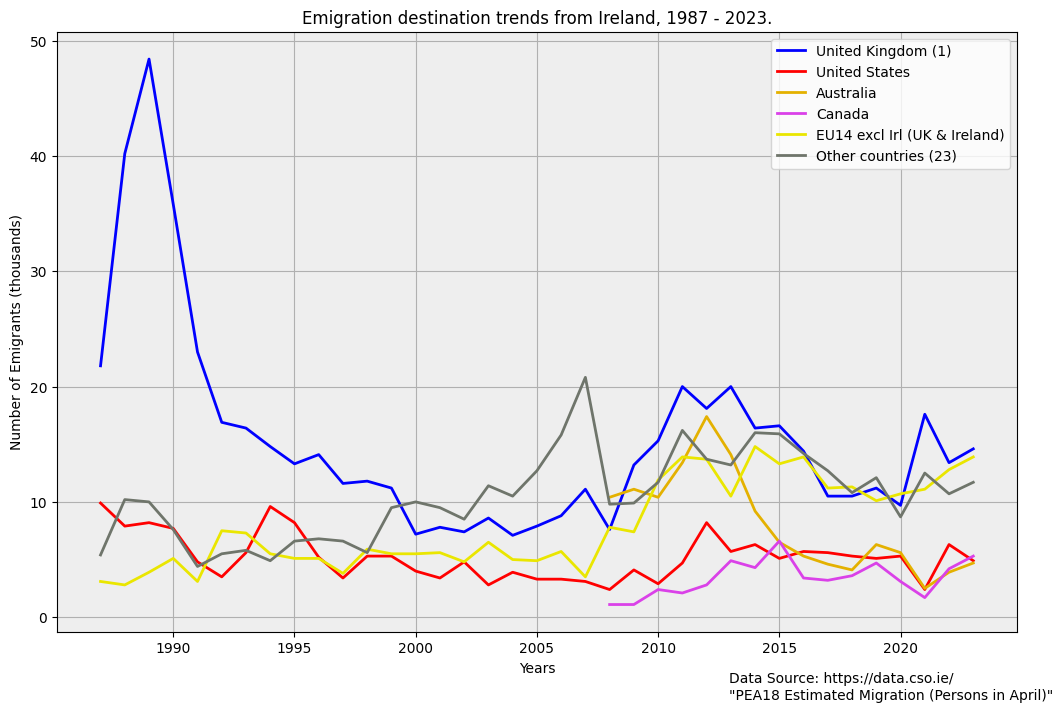

In [10]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

desired_order = ["United Kingdom (1)", "United States", "Australia", "Canada", "EU14 excl Irl (UK & Ireland)", "Other countries (23)"]
colors=["blue", "red", "#E4B100", "#DA41E8", "#EAE600", "#6F756B"]
i = 0
for group in desired_order:
    if group in grouped.groups:
        grouped.get_group(group).plot(x="Year", y="VALUE", color=colors[i],linewidth=2, ax=ax, label=group)
    i += 1

title_string = "Emigration destination trends from Ireland, 1987 - 2023."
plt.title(title_string)
plt.xlabel('Years')
plt.ylabel('Number of Emigrants (thousands)')
ax.set_facecolor('#EEEEEE')
plt.grid(True)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.text(0.7, -0.112, "Data Source: https://data.cso.ie/ \n\"PEA18 Estimated Migration (Persons in April)\"", ha='left', transform=ax.transAxes)

plt.savefig('EmigrationLine-19872023.png')

plt.show()

In [20]:
country1 = "United States"
country2 = "Canada"
filtered_df = df[((df['Country'] == country1) | (df['Country'] == country2)) & (df['Sex'] == 'Both sexes') & (df['Origin or Destination'] == "Emigrants: All destinations") & (df['Year'] >= 2007)]
print(filtered_df)

                             STATISTIC Label  Year        Country         Sex  \
1450  Estimated Migration (Persons in April)  2007  United States  Both sexes   
1459  Estimated Migration (Persons in April)  2007         Canada  Both sexes   
1522  Estimated Migration (Persons in April)  2008  United States  Both sexes   
1531  Estimated Migration (Persons in April)  2008         Canada  Both sexes   
1594  Estimated Migration (Persons in April)  2009  United States  Both sexes   
1603  Estimated Migration (Persons in April)  2009         Canada  Both sexes   
1666  Estimated Migration (Persons in April)  2010  United States  Both sexes   
1675  Estimated Migration (Persons in April)  2010         Canada  Both sexes   
1738  Estimated Migration (Persons in April)  2011  United States  Both sexes   
1747  Estimated Migration (Persons in April)  2011         Canada  Both sexes   
1810  Estimated Migration (Persons in April)  2012  United States  Both sexes   
1819  Estimated Migration (P

In [21]:
grouped = filtered_df.groupby("Country")

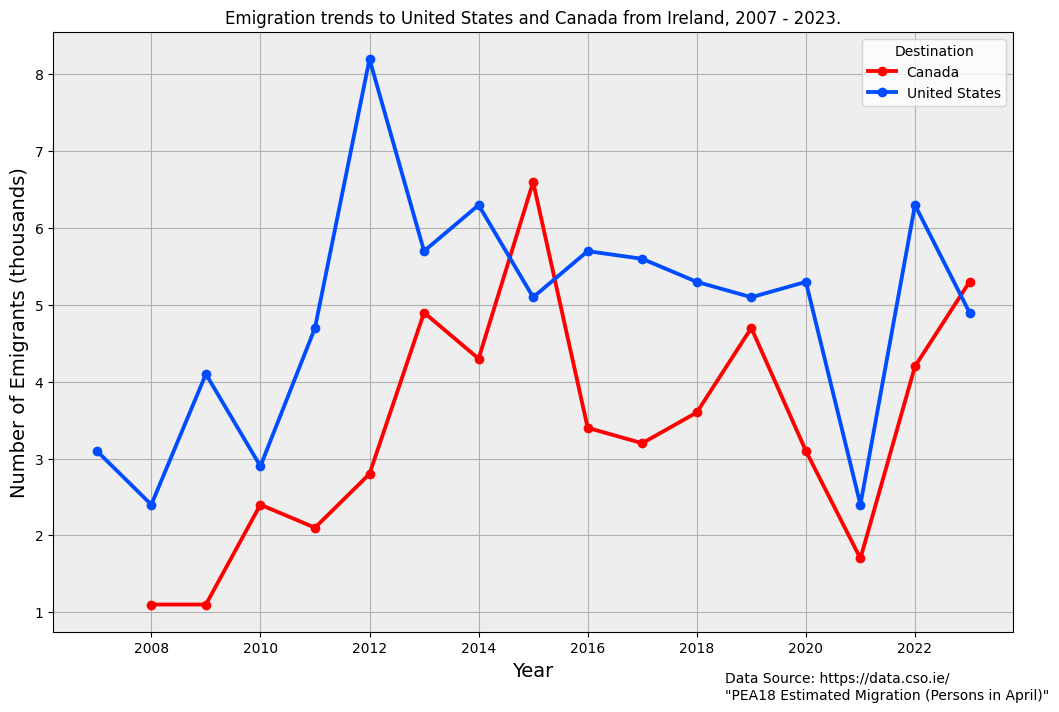

In [22]:
fig, ax = plt.subplots(1,1,figsize=(12,8))

colors = ["red","#004DFF"]
i = 0
for country, group in grouped:
    group.plot(x="Year", y="VALUE", color=colors[i],linewidth=2.75, ax=ax, label=country, marker="o")
    i+=1

title_string = "Emigration trends to "+country1+" and "+country2+" from Ireland, 2007 - 2023."
plt.title(title_string)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Emigrants (thousands)', fontsize=14)
plt.legend(loc="upper right", title="Destination")
ax.set_facecolor('#EEEEEE')
plt.grid(True)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.15)
plt.text(0.7, -0.112, "Data Source: https://data.cso.ie/ \n\"PEA18 Estimated Migration (Persons in April)\"", ha='left', transform=ax.transAxes)

plt.savefig("EmigrationTrend"+country1+country2+"-19872023.png")

plt.show()